In [0]:
import datetime as dt
import json
import numpy as np
import pandas as pd
import re
import requests
import tweepy
import time
import matplotlib.pyplot as plt
%matplotlib inline

In [47]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Gather

In [48]:
tweets = pd.read_csv("gdrive/My Drive/Colab Notebooks/twitter-archive-enhanced.csv", encoding = 'utf-8')
tweets.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [49]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open(url.split('/')[-1], mode = 'wb') as file:
    file.write(response.content)
    
imag = pd.read_csv('image-predictions.tsv', sep = '\t')
images = imag.copy()
images.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [50]:
df = []
errors = []
tweet_file = open('gdrive/My Drive/Colab Notebooks/tween_json.json', 'r')
for line in tweet_file:
    try:
        tweet = json.loads(line)
        print(tweet)
        favorites = tweet['favorite_count'] 
        retweets = tweet['retweet_count'] # Count of the retweet
        user_followers = tweet['user']['followers_count'] 
        user_favourites = tweet['user']['favourites_count'] 
        date_time = tweet['created_at'] 
        df.append({'tweet_id': int(id),
                        'favorites': int(favorites),
                        'retweets': int(retweets),
                        'user_followers': int(user_followers),
                        'user_favourites': int(user_favourites),
                        'date_time': pd.to_datetime(date_time)})
        
    except Exception as e: 
        errors.append(tweet_id)
        print("error : ",e)




Output hidden; open in https://colab.research.google.com to view.

In [0]:
df = pd.DataFrame(df, columns = ['tweet_id', 'favorites', 'retweets',
                                               'user_followers', 'user_favourites', 'date_time'])
# Save the dataFrame in file
df.to_csv('tweet_json.txt', encoding = 'utf-8', index=False)

In [52]:
tweet_dat = pd.read_csv('tweet_json.txt', encoding = 'utf-8')
tweet_data = tweet_dat.copy()
tweet_data.head(5)

,tweet_id,favorites,retweets,user_followers,user_favourites,date_time
0,694206574471057408,39467,8853,3200889,114031,2017-08-01 16:23:56
1,694206574471057408,33819,6514,3200889,114031,2017-08-01 00:17:27
2,694206574471057408,25461,4328,3200889,114031,2017-07-31 00:18:03
3,694206574471057408,42908,8964,3200889,114031,2017-07-30 15:58:51
4,694206574471057408,41048,9774,3200889,114031,2017-07-29 16:00:24


# Assess

### Assessing tweets dataframe (twitter-archive-enhanced.csv)

In [53]:
tweets.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1534,689993469801164801,NaN,NaN,2016-01-21 02:10:37 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Here we are witnessing a rare High Stepping Al...,NaN,NaN,NaN,https://vine.co/v/ienexVMZgi5,12,10,None,None,floofer,None,None
2145,669926384437997569,NaN,NaN,2015-11-26 17:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've never seen a dog so genuinely happy about...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669926384...,12,10,None,None,None,None,None
1528,690348396616552449,NaN,NaN,2016-01-22 01:40:58 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Oddie. He's trying to communicate. 12/...,NaN,NaN,NaN,https://vine.co/v/iejBWerY9X2,12,10,Oddie,None,None,None,None
443,819347104292290561,NaN,NaN,2017-01-12 00:55:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Anna and Elsa. They fall asleep i...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/819347104...,12,10,Anna,None,None,None,None
1580,687127927494963200,NaN,NaN,2016-01-13 04:23:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Gordon. He's an asshole. 9/10 would still...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/687127927...,9,10,Gordon,None,None,None,None


In [54]:
tweets.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [55]:
tweets.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [56]:
tweets['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [57]:
tweets['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [58]:
tweets.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

#### Any name starting from lowercase is actually not a name like an,such,the,very etc.

In [59]:
(tweets.loc[(tweets['name'].str.islower())]).name.value_counts()

a               55
the              8
an               7
very             5
one              4
just             4
quite            4
actually         2
not              2
getting          2
mad              2
infuriating      1
life             1
all              1
space            1
his              1
this             1
officially       1
my               1
old              1
incredibly       1
by               1
unacceptable     1
such             1
light            1
Name: name, dtype: int64

** getting the name of the dog by looking  after 'named' and 'name is' in text colum **

In [60]:
print("named  ", len(tweets.loc[(tweets['name'].str.islower()) & (tweets['text'].str.contains('named'))]))
print("name is ",len(tweets.loc[(tweets['name'].str.islower()) & (tweets['text'].str.contains('name is'))]))

named   20
name is  2


**rows having &amp; instead of '&' in 'text' column**

In [61]:
# row count in tweets which contain '&amp;' instead of '&' in 'text' column
len(tweets[tweets.text.str.contains('&amp;')])

54

**Decimal rating**

In [62]:
len(tweets[tweets.text.str.contains(r"(\d+\.\d*\/\d+)")])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


6

### Assessing images dataframe (image-predictions.tsv)

In [63]:
images.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2015,879492040517615616,https://pbs.twimg.com/media/DDSVWMvXsAEgmMK.jpg,1,German_short-haired_pointer,0.479896,True,vizsla,0.124353,True,bath_towel,0.073320,False
1594,798697898615730177,https://pbs.twimg.com/media/CeRoBaxWEAABi0X.jpg,1,Labrador_retriever,0.868671,True,carton,0.095095,False,pug,0.007651,True
1520,787810552592695296,https://pbs.twimg.com/media/Cu7dg2RXYAIaGXE.jpg,2,pug,0.362835,True,French_bulldog,0.221864,True,English_setter,0.080418,True
105,667861340749471744,https://pbs.twimg.com/media/CUS4WJ-UsAEJj10.jpg,1,malamute,0.967275,True,Siberian_husky,0.016168,True,Eskimo_dog,0.011277,True
1131,728046963732717569,https://pbs.twimg.com/media/ChqK2cVWMAAE5Zj.jpg,1,Newfoundland,0.255971,True,groenendael,0.175583,True,German_shepherd,0.164135,True


In [64]:
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [65]:
images.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


### Assessing tweet_data dataframe (tweet_json.txt)

In [66]:
tweet_data.describe()

,tweet_id,favorites,retweets,user_followers,user_favourites
count,2.354000e+03,2354.000000,2354.000000,2.354000e+03,2354.000000
mean,6.942066e+17,8080.968564,3164.797366,3.200942e+06,114031.010195
std,0.000000e+00,11814.771334,5284.770364,4.457302e+01,0.100478
min,6.942066e+17,0.000000,0.000000,3.200799e+06,114031.000000
25%,6.942066e+17,1415.000000,624.500000,3.200898e+06,114031.000000
50%,6.942066e+17,3603.500000,1473.500000,3.200945e+06,114031.000000
75%,6.942066e+17,10122.250000,3652.000000,3.200953e+06,114031.000000
max,6.942066e+17,132810.000000,79515.000000,3.201018e+06,114032.000000


In [67]:
tweet_data.user_favourites.value_counts()

114031    2330
114032      24
Name: user_favourites, dtype: int64

## Quality
Completeness, Validity, Accuracy, Consistency , i.e. content issues<br><br>
### twitter_archive dataset

- We don't want retweets.
- Erroneous datatypes (timestamp, tweet_id, in_reply_to_status_id, in_reply_to_user_id).
- The numerator and denominator columns have invalid values.
- Extra characters after '&'
- In several columns null objects are non-null (None to NaN).
- Name column have invalid names i.e 'None', 'a', 'an' etc.
- Remove colums like 'retweeted_status_id' , 'retweeted_status_user_id and 'retweeted_status_timestamp' because we don't need them .

### image_predictions dataset
- Tweets with no images (2075 rows instead of 2356)
- Some tweet_ids have the same jpg_url
- Some tweets are have 2 different tweet_id one redirect to the other (Dataset contains retweets)

### tweet_data dataset
- Remove column user_favourites

## Tidiness
Untidy data , i.e. structural issues<br><br>

- Dog "stage" variable in four columns: doggo, floofer, pupper, puppo
- Join 'tweet_data' and 'images' to 'tweets'


# Clean

**Merging data**

In [68]:

tweet = pd.merge(tweets, images, how = 'left', on = ['tweet_id'] )
tweet = pd.merge(tweet, tweet_data, how = 'left', on = ['tweet_id'])
tweet.to_csv('df_master.csv', encoding = 'utf-8')
tweet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4709 entries, 0 to 4708
Data columns (total 33 columns):
tweet_id                      4709 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     4709 non-null object
source                        4709 non-null object
text                          4709 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 4650 non-null object
rating_numerator              4709 non-null int64
rating_denominator            4709 non-null int64
name                          4709 non-null object
doggo                         4709 non-null object
floofer                       4709 non-null object
pupper                        4709 non-null object
puppo                         4709 non-null object
jpg_url                       44

#### Remove retweets


In [0]:
tweet = tweet[pd.isnull(tweet.retweeted_status_id)]

####  Remove tweets with no image

In [0]:
tweet = tweet.dropna(subset = ['jpg_url'])

#### Remove duplicates

In [0]:
tweet = tweet.drop_duplicates()

#### Remove columns that are not required
'retweeted_status_id' , 'retweeted_status_user_id' , 'retweeted_status_timestamp' , 'user_favourites' and 'date_time'

In [0]:

tweet = tweet.drop(['retweeted_status_id','retweeted_status_user_id' , 'retweeted_status_timestamp' , 'date_time','user_favourites'], 1)

#### Create 'dog_stage' variable which is made by extracting the dog stage variables from the text column when available 


In [0]:
tweet['dog_stage'] = tweet['text'].str.extract('(puppo|pupper|floofer|doggo)', expand=True)

In [0]:
tweet = tweet.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)


#### Correct numerator and denominator columns that have invalid values and are in float. 

In [0]:
tweet['name'] = tweet['name'].replace('None', np.NaN)

In [77]:
num_den = tweet['text'].str.extract(('(\d+(\.\d+)|(\d+))\/(\d+)'), expand=False)
num_den.columns = ['A','B','C','D']
num_den.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4347 entries, 0 to 4708
Data columns (total 4 columns):
A    4347 non-null object
B    4 non-null object
C    4343 non-null object
D    4347 non-null object
dtypes: object(4)
memory usage: 329.8+ KB


In [78]:
num_den.A.unique()

array(['13', '12', '14', '13.5', '11', '6', '10', '0', '84', '24', '9.75',
       '5', '11.27', '3', '7', '8', '9', '4', '165', '1776', '204', '50',
       '99', '80', '45', '60', '44', '143', '121', '11.26', '2', '144',
       '88', '1', '420'], dtype=object)

In [79]:
tweet.iloc[num_den[num_den.A =='0'].index.values]['text'].values

array(['This is Jimison. He was just called a good boy. 13/10 https://t.co/djMep7mGkV',
       'This is Cassie. She can go from sweet to scary af in a matter of seconds. 10/10 points deducted for cats on pajamas https://t.co/B6dmZmJBdK'],
      dtype=object)

In [80]:
tweet.iloc[num_den[num_den.A =='1776'].index.values]['text'].values

array(['WeRateDogs stickers are here and they\'re 12/10! Use code "puppers" at checkout 🐶🐾\n\nShop now: https://t.co/k5xsufRKYm https://t.co/ShXk46V13r'],
      dtype=object)

In [81]:
num_den.D.unique()

array(['10', '70', '7', '150', '11', '170', '20', '50', '90', '80', '40',
       '130', '110', '120', '2'], dtype=object)

In [82]:
tweet.iloc[num_den[num_den.D == '170'].index.values]['text'].values

array(["Meet Beau &amp; Wilbur. Wilbur stole Beau's bed from him. Wilbur now has so much room for activities. 9/10 for both pups https://t.co/GPaoH5qWEk"],
      dtype=object)

In [0]:
tweet['rating_numerator'] = num_den.A.astype(float)
tweet['rating_denominator'] = num_den.D.astype(float)

#### Change datatypes of required variables

Change datatype of timestamp to datetime and tweet_id, in_reply_to_status_id, and in_reply_to_user_id to strings.

In [0]:
tweet['timestamp'] = pd.to_datetime(tweet['timestamp'])
tweet['tweet_id'] = tweet['tweet_id'].astype('str')
tweet['in_reply_to_status_id'] = tweet['in_reply_to_status_id'].astype('str')
tweet['in_reply_to_user_id'] = tweet['in_reply_to_user_id'].astype('str')


## Store

In [0]:
# Save clean DataFrame to csv file
tweet.to_csv('tweet.csv')

# Analyze

In [86]:
tweet.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorites,retweets,user_followers,dog_stage
0,892420643555336193,nan,nan,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,...,bagel,0.085851,False,banana,0.076110,False,NaN,NaN,NaN,NaN
1,892177421306343426,nan,nan,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,...,Pekinese,0.090647,True,papillon,0.068957,True,NaN,NaN,NaN,NaN
2,891815181378084864,nan,nan,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,...,malamute,0.078253,True,kelpie,0.031379,True,NaN,NaN,NaN,NaN
3,891689557279858688,nan,nan,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,...,Labrador_retriever,0.168086,True,spatula,0.040836,False,NaN,NaN,NaN,NaN
4,891327558926688256,nan,nan,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,...,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,NaN,NaN,NaN,NaN


In [87]:
tweet.corr()

,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,favorites,retweets,user_followers
rating_numerator,1.000000,0.200123,0.009924,1.441427e-02,-2.632937e-02,-2.875561e-02,NaN,NaN,NaN
rating_denominator,0.200123,1.000000,0.009806,2.566510e-02,-4.271516e-02,-2.828948e-02,NaN,NaN,NaN
img_num,0.009924,0.009806,1.000000,3.062068e-01,-1.893023e-01,-2.686744e-01,NaN,NaN,NaN
p1_conf,0.014414,0.025665,0.306207,1.000000e+00,-5.056387e-01,-8.049883e-01,4.987945e-15,-4.825355e-15,1.255567e-12
p2_conf,-0.026329,-0.042715,-0.189302,-5.056387e-01,1.000000e+00,4.653319e-01,9.009041e-16,7.700823e-15,1.336947e-12
p3_conf,-0.028756,-0.028289,-0.268674,-8.049883e-01,4.653319e-01,1.000000e+00,1.263059e-14,-5.839510e-15,-1.296184e-12
favorites,NaN,NaN,NaN,4.987945e-15,9.009041e-16,1.263059e-14,1.000000e+00,7.028814e-01,-4.382600e-01
retweets,NaN,NaN,NaN,-4.825355e-15,7.700823e-15,-5.839510e-15,7.028814e-01,1.000000e+00,-3.578780e-01
user_followers,NaN,NaN,NaN,1.255567e-12,1.336947e-12,-1.296184e-12,-4.382600e-01,-3.578780e-01,1.000000e+00


<br><br>From the correlation coefficients we can see that retweets and favorites are strongly correlated with coefficient value of 0.929136 . Lets have a look at them graphically.<br>

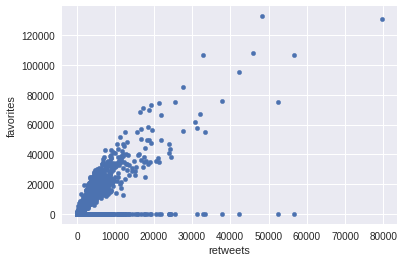

In [88]:
tweet.plot.scatter('retweets', 'favorites')

###  Let us analyze the different dog stages .<br>

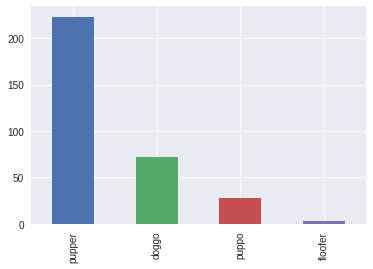

In [89]:
tweet.dog_stage.value_counts().plot(kind = 'bar')

Most dogs are in pupper stage as compared to rest of the stages.

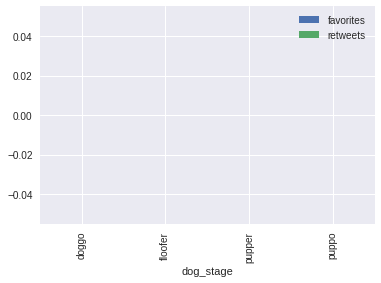

In [90]:
tweet.groupby('dog_stage')['favorites', 'retweets'].mean().plot(kind = 'bar')

**Floofer gets the highest favorites and retweets while pupper gets the highest inspite of having the highest frequency.**

Also, one unique thing about the ratings is that most of them are out of 10 but are still more than than. Lets see how they vary.

In [91]:
tweet.rating_numerator.value_counts()

10.00      2772
12.00       450
11.00       396
13.00       261
9.00        151
8.00         95
7.00         52
14.00        35
6.00         32
5.00         32
3.00         19
4.00         16
2.00          9
1.00          5
0.00          2
11.26         1
50.00         1
84.00         1
204.00        1
13.50         1
165.00        1
24.00         1
143.00        1
99.00         1
420.00        1
45.00         1
121.00        1
11.27         1
80.00         1
60.00         1
44.00         1
9.75          1
144.00        1
88.00         1
1776.00       1
Name: rating_numerator, dtype: int64

Text(0,0.5,'numerator')

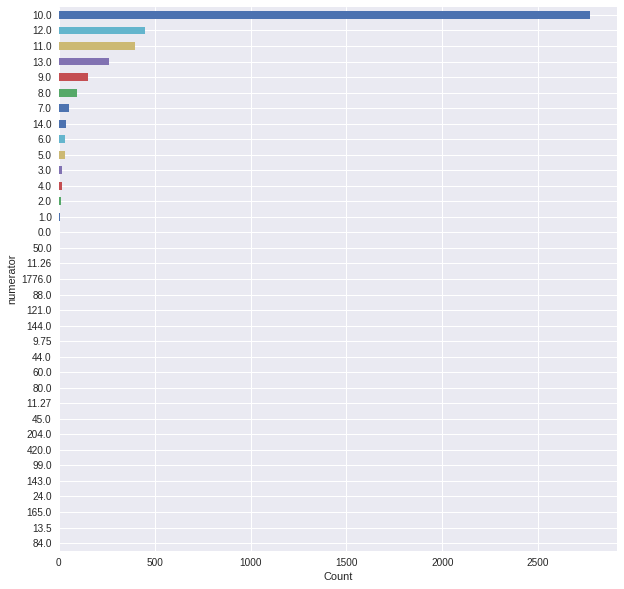

In [92]:
# df_by_breed = tweet.groupby('dog_breed').filter(lambda x: len(x) >= 20)
plt.figure(figsize = (10,10))
ratings = tweet.rating_numerator.value_counts()
ratings.sort_values().plot(kind = 'barh')
plt.xlabel('Count')
plt.ylabel('numerator')